In [1]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

In [2]:
data = pd.read_csv("No_Duplicate_Korea_Articles.csv")
data.head()

,Date,Headline,Articles
0,"Published : Apr 5, 2020 - 17:57 Updated...",Calls grow for BOK intervention amid COVID-19 ...,Bank of Korea (Yonhap)Increasingly pressed to ...
1,"Published : Apr 5, 2020 - 17:34 Updated...",S. Korea to post negative GDP growth due to co...,(Yonhap)South Korea is likely to post negative...
2,"Published : Apr 5, 2020 - 17:01 Updated...",Korea’s listed firms’ earnings to shrink 17% i...,(Yonhap)South Korea’s listed companies are lik...
3,"Published : Apr 5, 2020 - 16:56 Updated...",Jeongdong Theater to stream ‘Red Cliff’ online,Jeongdong Theater in central Seoul is to strea...
4,"Published : Apr 5, 2020 - 16:50 Updated...",Online payments rise amid coronavirus spread: ...,(Yonhap)Under the prolonged impact of the COVI...


In [6]:
# top2vec = Top2Vec(documents=data.Articles, speed="deep-learn", workers=4)

In [7]:
# top2vec.save("Korea_Covid-19_Top2Vec_model")

In [3]:
top2vec = Top2Vec.load("Korea_Covid-19_Top2Vec_model")

In [4]:
top2vec.get_num_topics()

127

In [5]:
topic_sizes, topic_nums = top2vec.get_topic_sizes()
print(topic_sizes)
print("-----------------")
print(topic_nums)

[284 251 244 210 205 191 178 166 150 148 143 142 138 134 133 131 130 130
 129 122 120 120 117 117 116 114 113 113 110 107 105 102 101  97  95  95
  92  92  91  91  88  87  87  86  84  84  83  82  80  80  79  78  77  76
  76  75  72  72  71  71  70  70  70  65  65  64  64  60  60  58  58  57
  56  56  56  55  55  55  54  54  53  53  53  52  52  50  50  49  49  48
  48  48  46  45  45  45  45  44  44  43  42  39  39  38  36  35  35  35
  35  35  34  34  34  33  33  33  32  31  29  29  28  27  25  23  23  21
  19]
-----------------
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 11

In [6]:
topic_words, word_scores, topic_nums = top2vec.get_topics(127)
print(topic_words)

[['supplementary' 'budget' 'extra' ... 'executed' 'deregulation'
  'assembly']
 ['syndicate' 'europeans' 'eurozone' ... 'deeper' 'indeed' 'coordinated']
 ['stores' 'shopping' 'store' ... 'fashion' 'parcel' 'duty']
 ...
 ['djaballah' 'cov' 'sars' ... 'racism' 'cancer' 'spreads']
 ['blossom' 'cherry' 'flower' ... 'crowds' 'tunnel' 'rescheduled']
 ['wt' 'taekwondo' 'championships' ... 'governance' 'teams' 'training']]


In [19]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["celltrion"], num_topics=5)
print(topic_words)
print("----------")
print(word_scores)
print("----------")
print(topic_scores)
print("----------")
print(topic_nums)
print("----------")

[array(['clinical', 'trials', 'drug', 'antibody', 'celltrion', 'drugs',
       'ct', 'phase', 'treatments', 'pipeline', 'kaylalim', 'trial',
       'treatment', 'pharma', 'antiviral', 'yeo', 'plasma', 'therapy',
       'efficacy', 'derived', 'gc', 'remsima', 'antibodies', 'medicines',
       'biotech', 'daewoong', 'blood', 'pharmaceutical', 'biotechnology',
       'cov', 'bioscience', 'therapeutics', 'therapeutic', 'biologics',
       'cancer', 'vaccines', 'pharmaceuticals', 'candidate', 'remdesivir',
       'develop', 'inflammation', 'lim', 'bio', 'gilead', 'sample',
       'vaccine', 'immune', 'lung', 'developing', 'protein'], dtype='<U15'), array(['bellwether', 'chipmaker', 'composite', 'mixed', 'slid', 'traded',
       'caps', 'gainers', 'dollar', 'inversely', 'benchmark', 'treasurys',
       'flat', 'offloaded', 'trading', 'hynix', 'gained', 'climbed',
       'shed', 'yields', 'closed', 'points', 'rose', 'currency', 'jumped',
       'dow', 'slipped', 'automaker', 'index', 'sentime

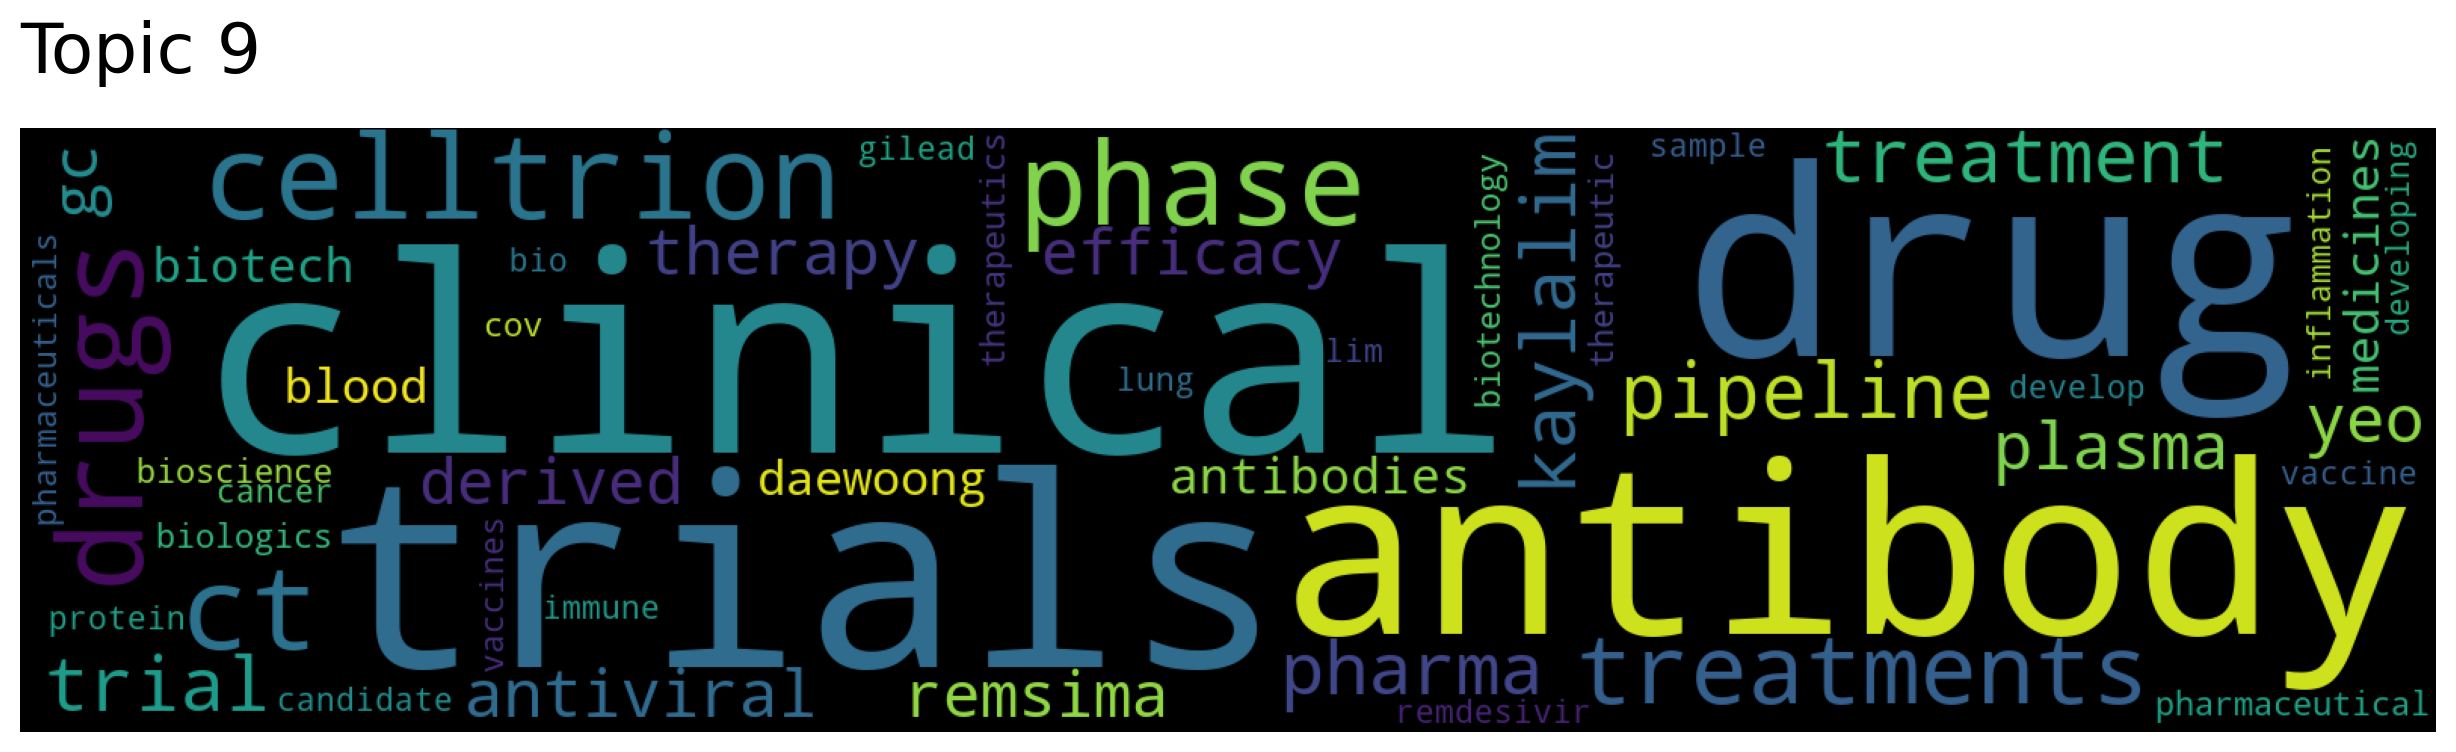

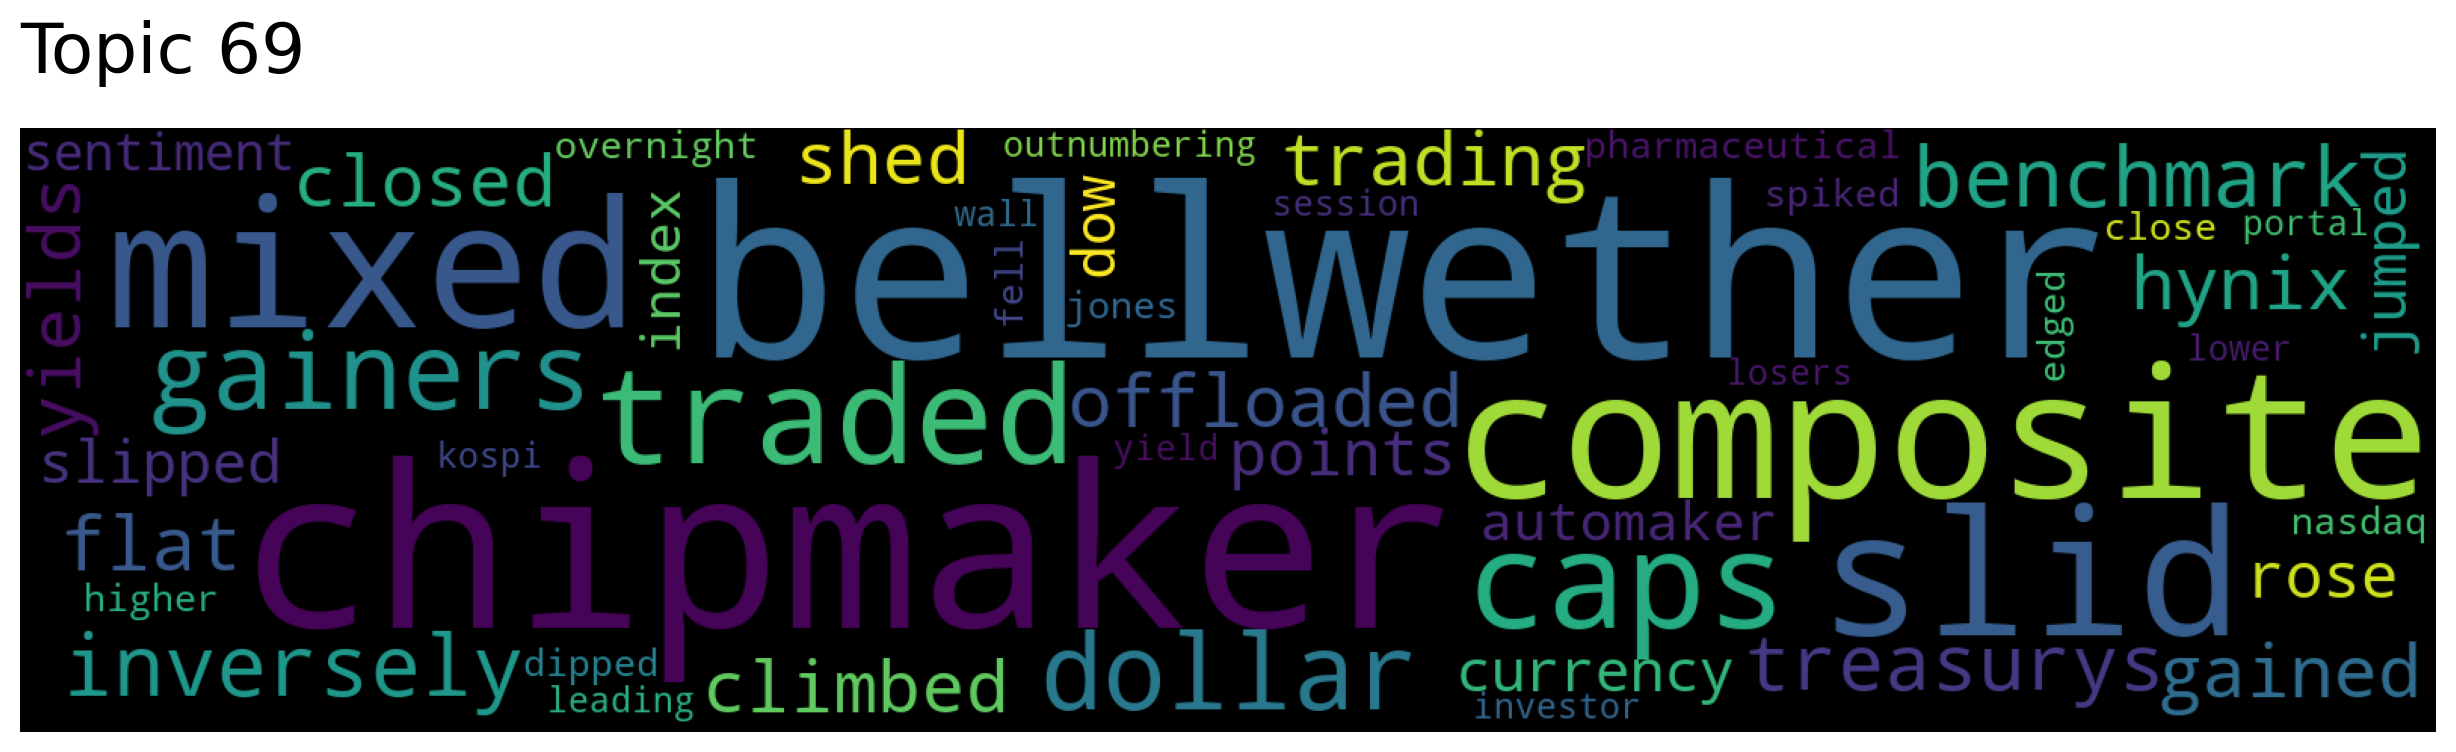

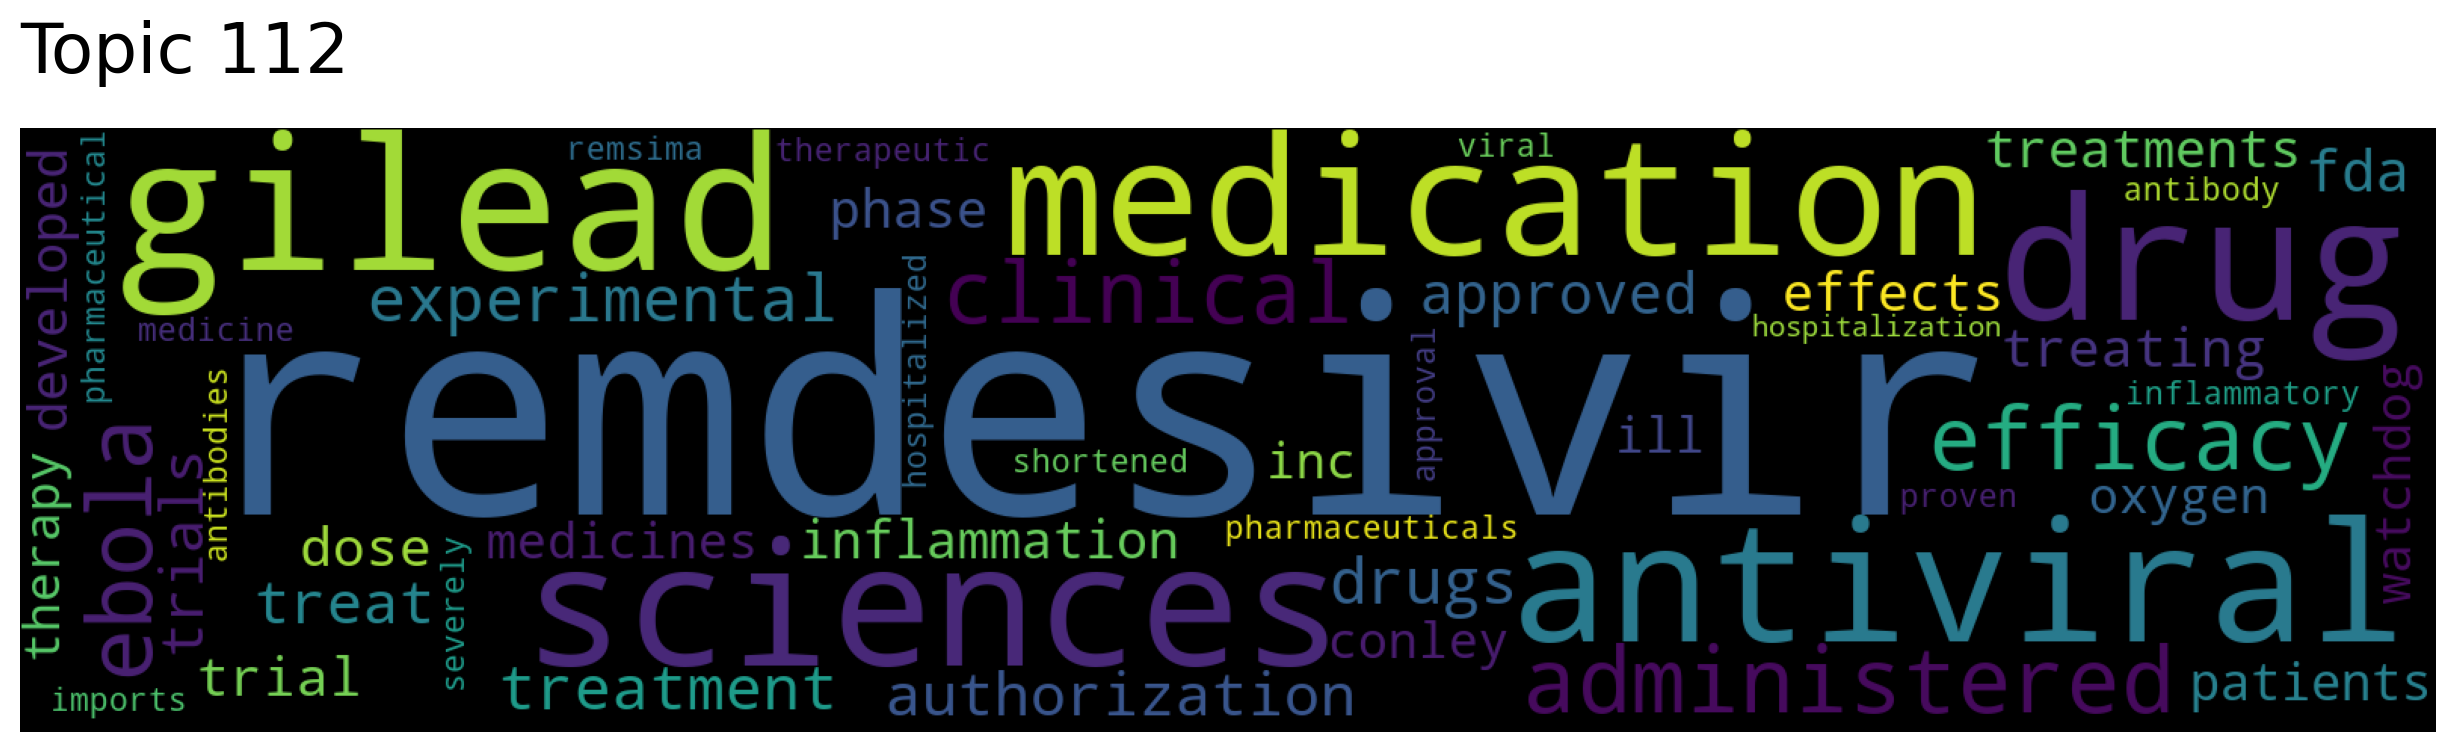

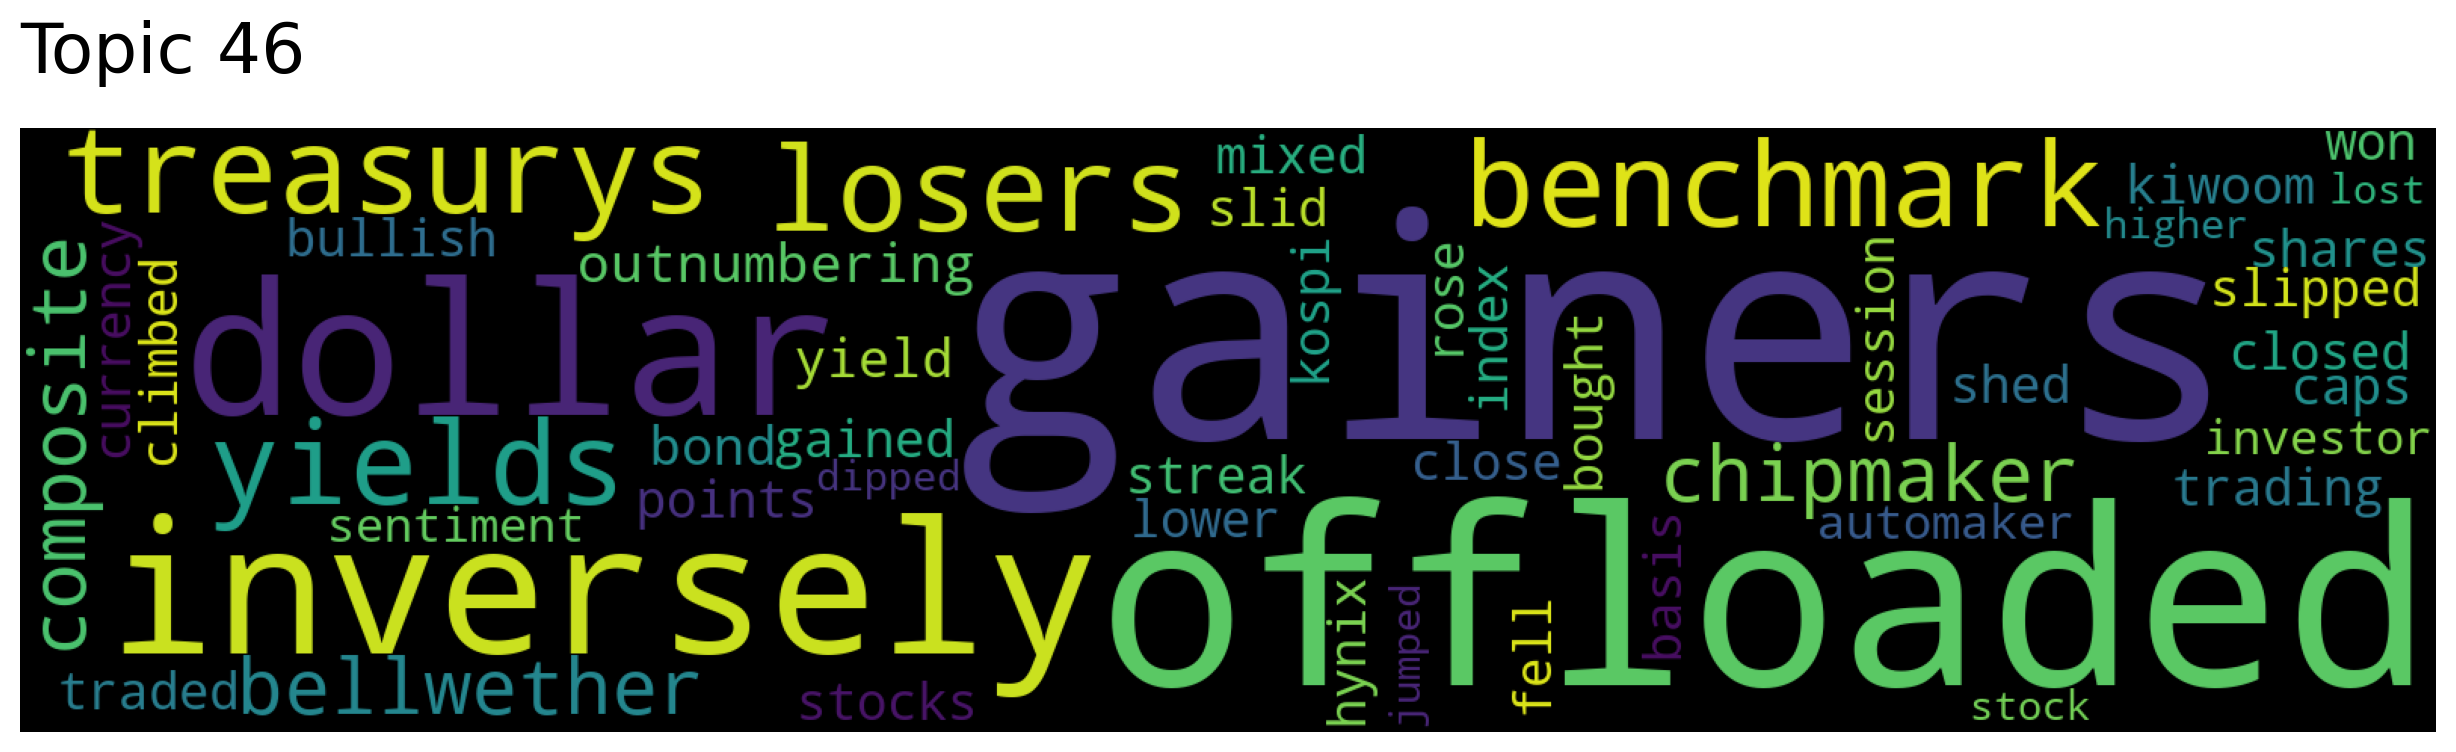

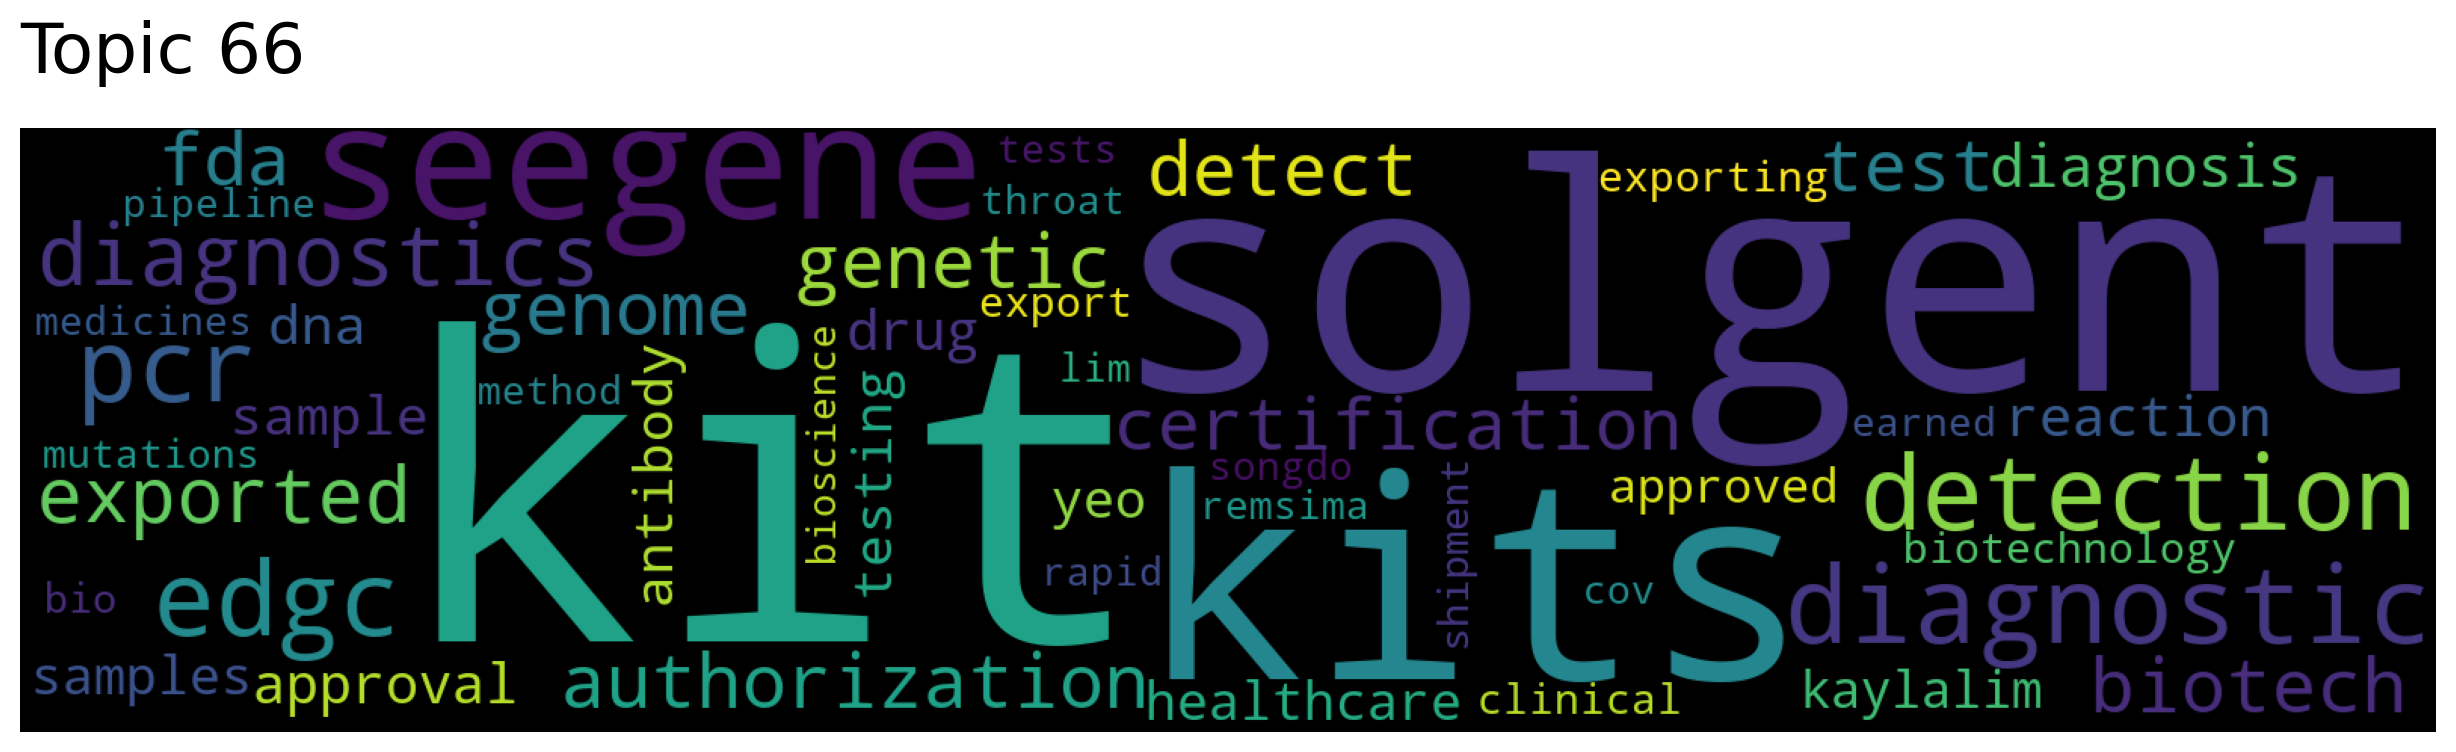

In [11]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["celltrion"], num_topics=5)
for topic in topic_nums:
    top2vec.generate_topic_wordcloud(topic)

In [18]:
documents, document_scores, document_ids = top2vec.search_documents_by_topic(topic_num=9, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 9334, Score: 0.6671518683433533
-----------
Stock photo of Celltrion Chairman Seo Jung-jin screencaptured from an online press event held in July 2020. (The Korea Herald)Celltrion Chairman Seo Jung-jin stirred up a storm Wednesday after saying in a radio interview that his company’s COVID-19 antibody treatment will eradicate the SARS-CoV-2 virus in the human body in four to five days from administration and that it will be available for emergency use in Korea starting at year-end. “In order to put a stop to the pandemic for good, there needs to be both the vaccine and the treatment,” Seo said live on the radio program. “And among treatments, the most potent are antibody treatments, or plasma-derived treatments.” From a clinical phase 1 trial targeting 18 lightly affected COVID-19 patients, Celltrion’s CT-P59 was shown to kill the SARS-CoV-2 virus in four to five days of the drug administration. The time consumed for full recovery was 44 percent faster in the group of people g

In [ ]:
documents, document_scores, document_ids = top2vec.search_documents_by_keywords(keywords=["Shinzo", "Abe"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

In [ ]:
words, word_scores = top2vec.similar_words(keywords=["Syria"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")